# (Simple Moving Averages & Optimization)[https://www.youtube.com/watch?v=vWVZxiaaTCs]

The strategy holds an asset when the short term SMA is above the long term SMA and is not holding the asset when the long term SMA is above the short term SMA.
The code is designed in a way that other strategies can be tested as well (e.g. EMA) with some amendments.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
ticker = "BTC-USD"
df = yf.download(ticker, start="2018-01-01")

[*********************100%***********************]  1 of 1 completed


In [6]:
def strategy(df, sma1, sma2):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["SMA1"] = df.Close.rolling(sma1).mean()
    df["SMA2"] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df["position"] = np.where(df["SMA1"] > df["SMA2"], 1, 0)
    df["stratret"] = df["position"].shift(1) * df["ret"]
    df = df.dropna()
    return df

In [8]:
def performance(df):
    return np.exp(df[["ret", "stratret"]].sum())

In [9]:
performance(strategy(df, 20, 50))

ret         2.068870
stratret    4.582276
dtype: float64

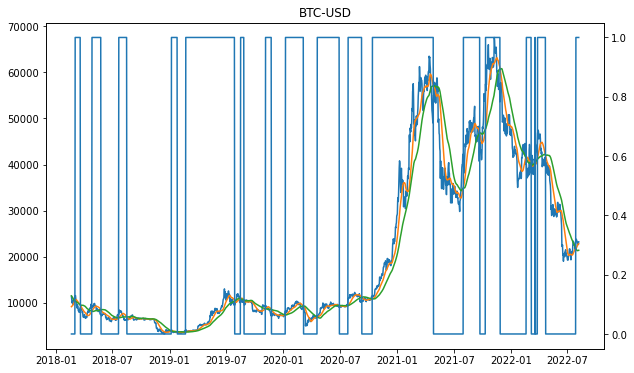

In [14]:
stratdf = strategy(df, 20, 50)
fig, ax = plt.subplots(figsize=(10, 6))
plt.title(ticker)
ax2 = ax.twinx()
ax.plot(stratdf[["Close", "SMA1", "SMA2"]])
ax2.plot(stratdf["position"])

In [16]:
SMA_list1 = range( 30, 101, 5)
SMA_list2 = range(130, 201, 5)

In [18]:
def Tester(SMAlist1, SMAlist2):
    profits = []
    a, b = [], []
    # i short term moving average
    # e long term moving average
    for i,e in zip(SMA_list1, SMA_list2):
        profit = performance(strategy(df, i, e))
        profits.append(profit)
        a.append(i)
        b.append(e)
    col = {"level_0": "SMA1", "level_1": "SMA2"}
    frame = pd.DataFrame(profits, [a,b]).reset_index().rename(columns=col)
    frame["edge"] = frame.stratret - frame.ret
    return frame.sort_values("edge", ascending=False)

In [19]:
Tester(SMA_list1, SMA_list2)

,SMA1,SMA2,ret,stratret,edge
1,35,135,2.728866,5.524069,2.795203
2,40,140,2.727946,4.883261,2.155315
0,30,130,2.567872,4.367193,1.799320
12,90,190,3.444756,4.805433,1.360677
3,45,145,3.104713,4.238047,1.133334
7,65,165,3.479021,4.287657,0.808636
8,70,170,3.430412,4.177956,0.747544
13,95,195,3.700325,4.395689,0.695364
5,55,155,3.090529,3.751517,0.660988
6,60,160,3.083344,3.655556,0.572212
